# Introduction

In chapter 7, exercise 4 of Tristan Needham's Visual Complex Analysis he asks the reader to draw the image of an expanding circle $\Gamma$ under an abritary third degree complex polynomial (hereby referred to as $f(z)$) with the help of a computer. He asks the reader to watch as the winding number of 0 with respect to $f(\Gamma)$ (i.e. $\nu(f(\Gamma), 0)$) changes as $\Gamma$ expands to the point that it contains the roots of $f$. Particularly he wants us to observe the shape that marks a birth of a new loop. 

The code below does just that with the help of animation.

In [1]:
%matplotlib notebook
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 

# Imports

First we import some necessary modules. These include the magic method ```%matplotlib notebook``` which prints plots in the jupyter notebook, ```cmath``` which contains methods concerning complex numbers, ```numpy``` which contains a variety of math related methods (including Random Number Generators, RNG), ```mathplotlib.pyplot``` which lets us plot graphs, and ```mathplotlib.animation``` which lets produce animated graphs. 

In [2]:
def translated_circle(radius = 1., angle = 0., translation_x = 0., \
                      translation_y = 0.):
    return radius*cmath.cos(angle) + translation_x + (radius*cmath.sin(angle) \
                            + translation_y)*(1j);

# Circles
Here I create a function called ```translated_circles```. This function will find the point on a circle of a given radius, at a given angle, with a given translation and return that point in complex form. This will simplify the creation of circles.

In [3]:
number_of_roots = 3;
maximum_modulus = 10.
random_roots = (2*maximum_modulus) * np.random.random_sample((number_of_roots, 2)) - (maximum_modulus);
roots_complex = []
for i in range(0, number_of_roots):
    roots_complex.append(random_roots[i][0] + (random_roots[i][1])*(1j))
    
real_x = []
imag_y = []
for i in range(0, len(roots_complex)):
    real_x.append(roots_complex[i].real)
    imag_y.append(roots_complex[i].imag)

# Generating Roots
Here I randomly generate three roots for our polynomial, represent them in complex form and assign them to a list (```roots_complex```). Each root has a maximum norm of ```maximum_modulus```. Their real values are assigned to ```real_x``` and their imaginary values are assigned to ```imag_y```.

In [4]:
radius_points = np.arange(start = .5 , stop = maximum_modulus + (int(np.sqrt(maximum_modulus))) , step = .5)
angle_points = np.arange(start = 0. , stop = 2 * np.pi + (2* np.pi/500), \
                          step = (2 * np.pi)/(500))

# Sampling Points on the Circle
Here I generate a list of values for the radius of our circles (in ```radius_points```) and angles (in ```angle_points```) to sample points on our circle.

<IPython.core.display.Javascript object>


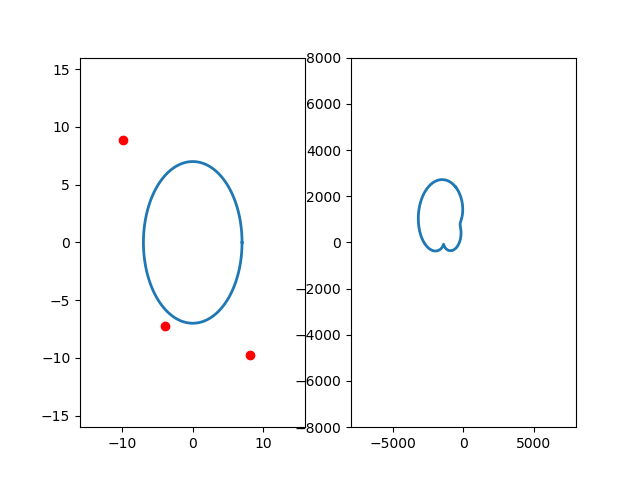

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
z_bound = (maximum_modulus + 2*(int(np.sqrt(maximum_modulus))));
w_bound = (2*maximum_modulus)**(number_of_roots)
ax[0].set_xlim(-z_bound, z_bound);
ax[0].set_ylim(-z_bound, z_bound);
ax[1].set_xlim(-w_bound, w_bound);
ax[1].set_ylim(-w_bound, w_bound);

# Setting Bounds and Jeeping References 

domain_objects = ax[0].plot([real_x],[imag_y], "ro", [], [], lw = 2);
codomain_objects, = ax[1].plot([],[], lw =2);

# initialization function 
def init(): 
    # creating plot 
    
    
    return domain_objects + [codomain_objects] 

#Initialization

# animation function 
def animate(i): 
    # i determines the radius of our circle 
    radius_size = radius_points[i]
    z_xpoints = []
    z_ypoints = []
    w_xpoints = []
    w_ypoints = []
    
    for i in range(0, len(angle_points)):
        z_point = translated_circle(radius = radius_size, angle = angle_points[i], translation_x = 0., \
                          translation_y = 0)
        
        z_xpoints.append(z_point.real)
        z_ypoints.append(z_point.imag)
        
        w_point = 1
        for j in range(0, len(roots_complex)):
            w_point = w_point*(z_point - roots_complex[j])
        
        w_xpoints.append(w_point.real)
        w_ypoints.append(w_point.imag)
        
    # appending new points to x, y axes points list 
    domain_objects[3].set_data(z_xpoints, z_ypoints)
    codomain_objects.set_data(w_xpoints,w_ypoints)
    return domain_objects + [codomain_objects]


# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, \
                               frames=len(radius_points), interval=800, blit=True)

# animation

# Setting Bounds and Keeping references
We start by creating a figure and axes object making sure to keeps references (assign them to variables) for future use. Note two subplots are created and thus ```ax``` is actually a list of two ```Artist``` of the ```container``` type. Our subplot is split into two columns. The left column will be our domain space and the right column our codomain. We create bounds for spaces and restrict the axis to those bounds.  Note, ```ax[0]``` is the bound of our domain space and ```ax[1]``` of our codomain space.

# Initialization
To speed up our animation we initialize the figure with several ```Artist``` of the ```primitive``` type. First in the domain we plot our roots and mark them with red circles. This is achieved by ```ax[0].plot([real_x], [image_y], "ro")```. Recall ```ax[0]``` refers to the domain space. By calling the plot method on it we can add primitives such as lines and points. The first input of ```plot``` tells the computer the x-coordinate of our roots and the second input tells the y-coordinate of our roots. ```ro``` tells the computer to plot red circles instead of lines. The following inputs of ```plot``` i.e. everything inside plot after ```"ro",``` tells the computer to also create a line primitve. The width of the line is 2 (as seen by ```lw=2```). For right now there are no points given to connect our line which is why there are two empty sets ```[],[]```. This will create a list of 4 primitives. Three primitives are the red circles and one is the empty line. We keep a reference to this list under the variable name ```domain_objects```.

For the codomain we only create one primitive. An empty line. This is done with the call ```ax[1].plot([],[], lw=2)```. We store a reference to this primitive under the variable name ```codomain_objects```. 

Finally we create an initilzation function to be used with our animation function. We define ```init``` and have it return the static primitives (i.e. the primitives or elements of the graph that do NOT change as the animation progresses).

# Animation

Finally we creat the actual animation function ```animate```. In our case, the function takes in one parameter. When we call ```animation.FuncAnimation``` the value of ```frames``` will generate a list of numbers from zero to said value. Each term in this list will be used as the input in our ```animate``` function. Every frame of our animation will produce a circle $\Gamma$ and an image circle $f(\Gamma)$. Thus each frame should have a specific radius associated to it. We set that radius to ```radius_size```. We then create an empty list for our domain and codomain x and y coordinates. We use our function ```translated_circle``` to obtain points on a circle with radius ```radius_size```, save those domain points to our list, transform those points into codomain points and save the codomain points to our other list. Finally we assign our domain points to our fourth domain primitive (the line primitive that started with two empty lists) and to our codomain primitive (again a line primitive that started with two empty lists). We concatenate all of our primitives into one list and return said list. Finishing this off with a call to ```animation.FuncAnimation``` we give a reference to our original figure object, ```fig```, our created ```animate``` and ```init``` function, input the number of desired frames, the length of time between frames (measured in miliseconds assiged with ```interval```) and tell the method to use blitting (this will speed up the animation by starting with all the primitives returned in our ```init``` function). As you can see we get a nice animation to aid us in understanding the evolution of winding numbers.